

# Project: Investigate a Dataset - [The Movie Database (TMDb)]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 
There are 21 columns in total

### Questions for Analysis

> **Questions:**
* Trend of *budjet_adj* as the years go by
* Dependence between *vote_average* and *budget_adj*. That is, do big budget movies receive higher votes 
* Relationship between vote_average and popualrity of a specific movie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [2]:
df = pd.read_csv("Database_TMDb_movie_data/tmdb-movies.csv")

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### *homepage,tagline,keywords,production_companies* have too many null values

#### Now we check for duplicated values

In [5]:
df.duplicated().sum()

1

#### Next couple of codeblocks are used to find shape and basic info about the dataset

In [6]:
df.shape

(10866, 21)

In [7]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [9]:
df["release_year"] = pd.DatetimeIndex(df['release_date']).year

In [10]:
df["release_year"].unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 2068, 1974, 1975, 2062, 2064, 2071, 1990, 2061,
       2060, 1976, 1993, 2067, 2063, 1986, 1973, 2070, 2065, 2069, 1978,
       2066])

#### Analysis of *release_year* shows erronous values(values greater than 2020)

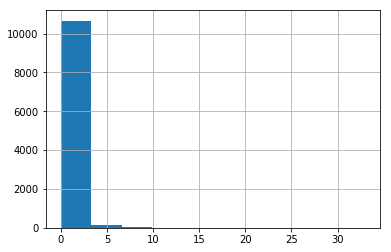

In [11]:
df["popularity"].hist();

#### Outliers exist with popularity>2.0


### Data Cleaning
 

#### Dropping columns with excessive null values

In [12]:
df.drop(["homepage","tagline","keywords","production_companies"],axis=1,inplace=True)

#### Removing rows with null values

In [13]:
df.dropna(inplace=True) #dropping rows with null values

#### Now we remove the single duplicated value

In [14]:
df.drop_duplicates(inplace=True)

#### Removing errors from *release_year*

In [15]:
df.drop(df[df['release_year'] >2040 ].index, inplace = True)

#### Dropping outliers from *popularity*  column

In [16]:
df.drop(df[df['popularity'] >2 ].index, inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis




### Trend of movie budget throught the years

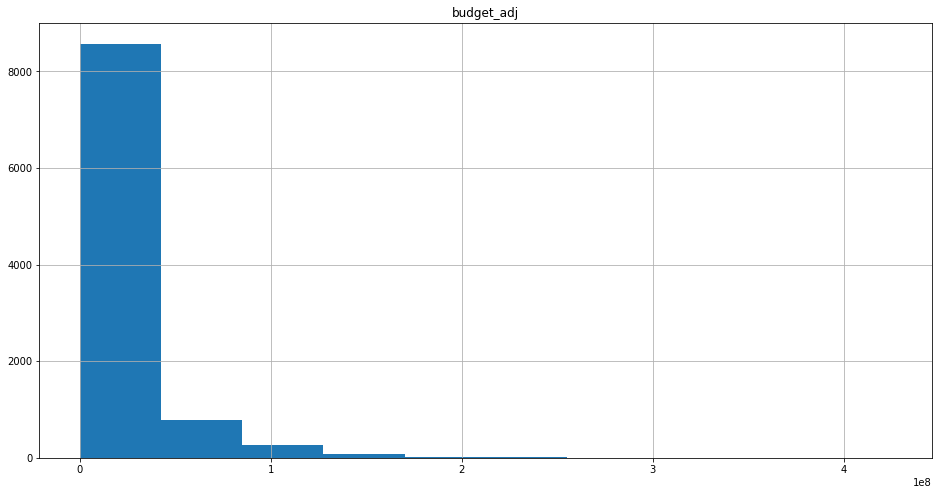

In [17]:
df.hist("budget_adj",figsize=(16,8));

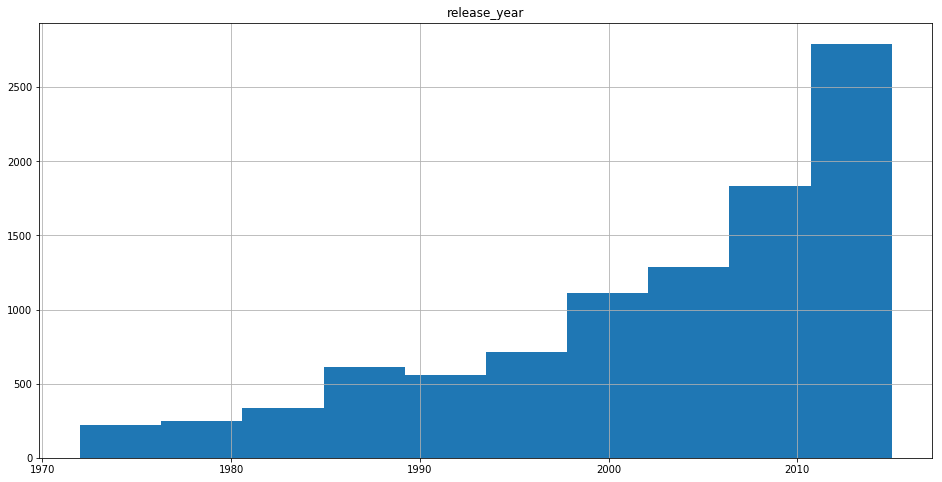

In [18]:
df.hist("release_year",figsize=(16,8));

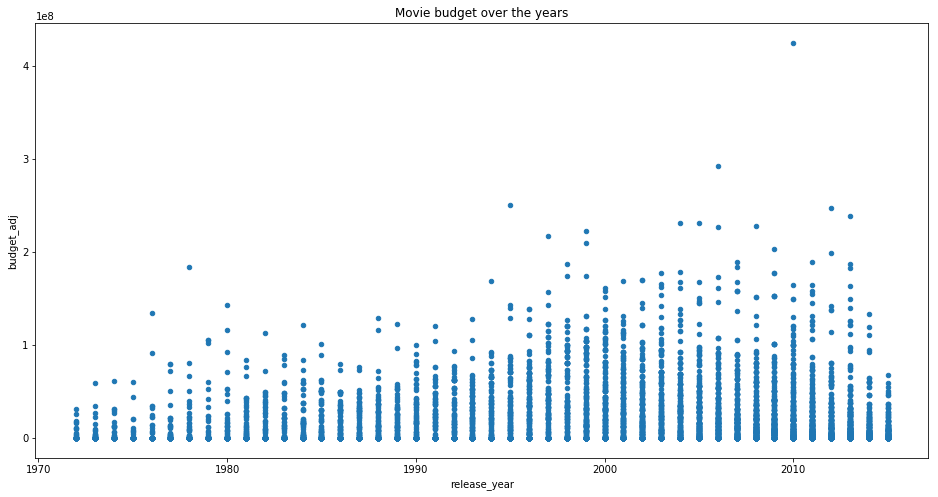

In [19]:

df.plot(kind="scatter",x="release_year",y="budget_adj",figsize=(16,8),title="Movie budget over the years");

### Dependence between vote_average and budget_adj. That is, do big budget movies receive higher votes

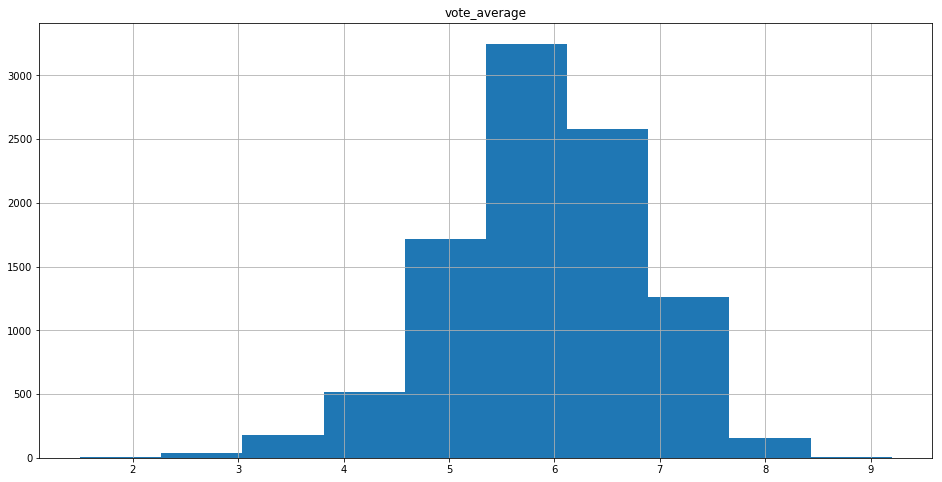

In [20]:
df.hist("vote_average",figsize=(16,8));

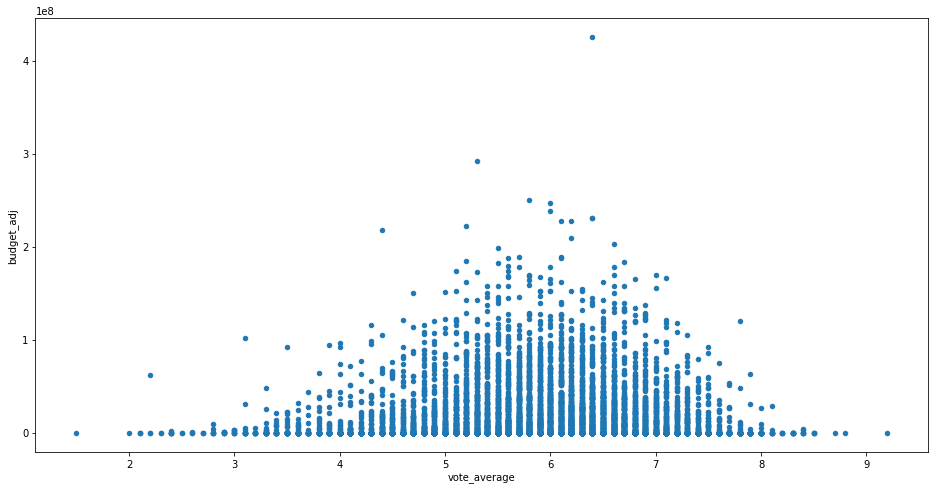

In [21]:

df.plot(y="budget_adj",x="vote_average",kind="scatter",figsize=(16,8));

### Relationship between vote_average and popualrity of a specific movie

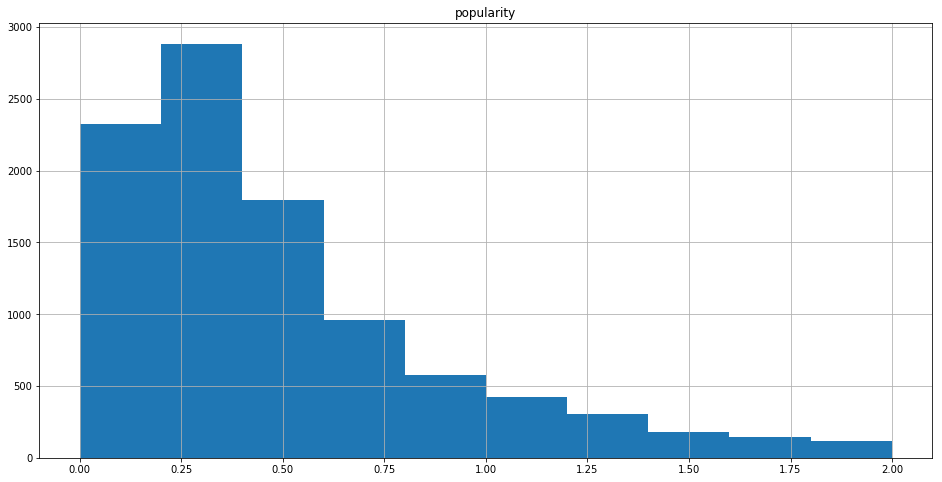

In [22]:
df.hist("popularity",figsize=(16,8));

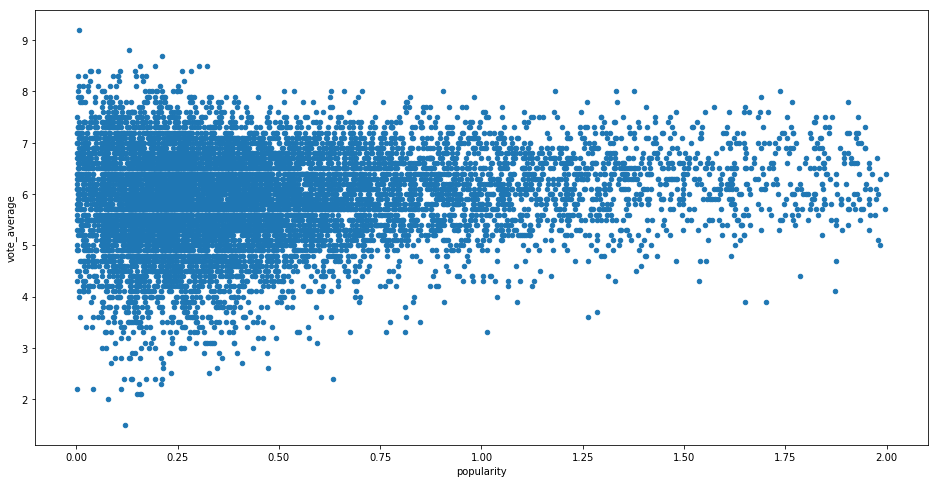

In [23]:
df.plot(x="popularity",y="vote_average",kind="scatter",figsize=(16,8));

<a id='conclusions'></a>
## Conclusions

> **Dependence between vote_avg and budget_adj**:
Scatter plot of vote_avg vs budget_adj gives a left skewed distribution. This means that on average, higher budget movies tend to receive higher votes. 

> **Trend of movie budget throught the years**:  
From the scatter plot, we can see that there is a steady increase in budget till the 2000s, after which a slguht decline is seen. This is excluing outliers, of course.

> **Relationship between vote_average and popualrity of a specific movie**:
Movies with low votes usually have less popularity. Other than that, no other conclusions can be drawn from the scatterplot

> **Limitations**:
* When calculating popularity, values above 2.0 were removed. This was done because only few movies(outliers) are present with popularity>2.0
* The column *release_year* contains error values(years>2020) which were removed. This may or may not have affected the final result 
## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0